### Activation Function

As funções de ativação são funções que decidem, dadas as entradas no nó, qual deve ser a saída do nó. Porque é a função de ativação que decide a saída real, muitas vezes nos referimos às saídas de uma camada como suas "ativações".

A entrada para a unidade de saída (output unit) é passada através de uma função de ativação, $f(h)$, neste caso, a função de etapa (step function):

\begin{equation*}
f(h) = \begin{cases}
0 & \text{if $h$ } \lt \text{ 0} \\
1 & \text{if $h$ } \ge \text{ 0}
\end{cases}
\end{equation*}

A unidade de saída (output unit) retorna o resultado de $f(h)$, onde $h$ é a entrada para a unidade de saída. (The output unit returns the result of f(h), where h is the input to the output unit):

$h = \sum_i w_i x_i + b$

Ficando a formula completa do neurônio (perceptron) da seguinte forma:

\begin{equation*}
f(x_1, x_2,\ldots,x_m) = \begin{cases}
0 & \text{if } b + \sum w_i . x_i \lt \text{ 0} \\
1 & \text{if } b + \sum w_i . x_i \ge \text{ 0}
\end{cases}
\end{equation*}

O diagrama abaixo mostra uma rede simples. A combinação linear dos pesos, entradas e bias (w, x, b) forma a entrada h, que passa através da função de ativação $f(h)$, dando a saída final do perceptron, rotulado como $y$.

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/589366f0_simple-neuron/simple-neuron.png)

A melhor parte sobre esta arquitetura, e o que torna possíveis redes neurais, é que a função de ativação $f(h)$ pode ser **qualquer função**, não apenas a step function mostrada anteriormente.

Por exemplo, se $f(h) = h$, a saída será a mesma que a entrada. Assim a saída da rede neural é $y = \sum_i w_i x_i + b$ pois $y = f(h) = h$

Outra função de ativação (activation function) usada é a logistic ou sigmoid:

$sigmoid(x) = 1/(1 + e^{-x})$

Desta forma, a saída do perceptron fica:

$y = f(h) = sigmoid(h)$

Onde:

- h = $\sum_i w_i x_i + b$
- w = weights (pesos para cada i)
- x = inputs
- b = bias

A implementação em Python fica:

In [1]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

inputs = np.array([0.7, -0.3])
weights = np.array([0.1, 0.8])
bias = -0.1

# TODO: Calculate the output
h = sum([(w*x) for w, x in zip(inputs, weights)])+bias # Input
# Poderia ser feito com h = np.dot(weights, inputs) + bias

output = sigmoid(h)

print('Output:')
print(output)


Output:
0.432907095035


### Sum of Squared Errors (SSE)

A rede neural ajusta os pesos buscando minimizar o erro da previsão o máximo possível. Para isso, é usado o SSE.

\begin{equation*}
E = \frac{1}{2} \sum_{\mu} \sum_{j} [y_j^{\mu} - ŷ_j^{\mu}]^2
\end{equation*}

SSE é a suma total dos erros de uma rede neural onde:

- $ŷ$ é o valor da predição
- $y$ é o valor real
- $j$ representa as unidades de saídas da rede neural
- $u$ representa cada data point

Primeiro, a soma interna sobre j. Esta variável j representa as unidades de saída da rede. Então, esta soma interna está dizendo para cada unidade de saída, encontrar a diferença entre o valor verdadeiro y e o valor previsto da rede ŷ, então faz o quadrado a diferença, em seguida, soma todos os quadrados. 

Então a outra soma sobre μ é uma soma sobre todos os pontos de dados. Assim, para cada ponto de dados você calcula a soma interna das diferenças ao quadrado para cada unidade de saída. Em seguida, você soma essas diferenças ao quadrado para cada ponto de dados. Isso resulta no erro geral para todas as previsões de saída para todos os pontos de dados. 

O SSE é uma boa escolha por algumas razões. O quadrado assegura que o erro é sempre positivo e erros maiores são penalizados mais do que erros menores. Além disso, torna a matemática agradável, sempre um plus.


A previsão, ou saída da rede neural, depende os pesos pois a previsão (saída) é igual a $f(h)$:

\begin{equation*}
ŷ_j^{\mu} = f(h) = f(\sum_i w_{ij} x_i^{\mu})
\end{equation*}

Sendo assim, o erro também depende dos pesos:

\begin{equation*}
E = \frac{1}{2} \sum_{\mu} \sum_{j} [y_j^{\mu} - f(\sum_i w_{ij} x_i^{\mu})]^2
\end{equation*}

Logo, ajustar os pesos influencia no total de erro da previsão. Para encontrar os pesos que resultem no menor erro, usa-se o **gradient descent**

### Gradient Descent

Gradiente é outro termo para taxa de mudança ou inclinação. Para calcular a taxa de mudança usamos funções derivadas.

A derivada (taxa de mudança inst) de uma função $f(x)$ retorna outra função $f'(x)$ que nos mostra a inclinação (coef. angular) no ponto $x$.

O gradiente é apenas um derivado generalizado para funções com mais de uma variável.

Para entender melhor o que é uma derivada seguem 2 videos rápidos sobre o assunto.

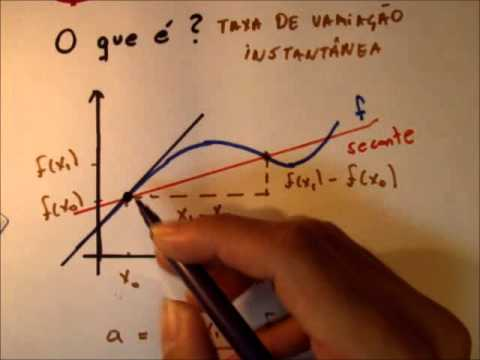

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('CQxb5ZXeY3E') # O que é uma derivada

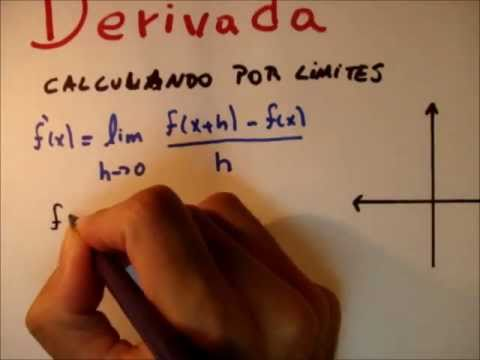

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('bGvYbU4Ax6U') # Calculando a derivada

O processo de atualização dos pesos ($w$) é feito atravez da [derivativa parcial](https://pt.wikipedia.org/wiki/Derivada_parcial) (para funções com mais de 1 variável) do erro obtido pelo SSE. O processo para chegar a equação de variação do peso é complicado pois usa mais de uma vez a derivada parcial e a [regra de cadeia](https://pt.wikipedia.org/wiki/Regra_da_cadeia). O mais importante agora é saber:

 - A váriação dos pesos ($w$) pode ser calculado como $\Delta w_i = \eta \delta x_i$ sendo $\delta$ (delta) calculado como:

\begin{equation*}
\delta = (y - ŷ)f'(h) = (y - ŷ)f'(\sum w_i x_i)
\end{equation*}

Lembre-se, na equação acima $(y - ŷ)$ é o erro de saída, e $f'(h)$ refere-se à derivada da função de ativação $f(h)$. Chamaremos esse derivado de gradiente de saída.

A implementação em Python fica:

In [3]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consilated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
h = np.dot(w, x)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y - nn_output

output_grad = sigmoid_prime(h)

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.
error_term = error * output_grad

# TODO: Calculate change in weights
del_w = [learnrate*error_term*i for i in x]

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.689974481128
Amount of Error:
-0.189974481128
Change in Weights:
[-0.020318691802303994, -0.040637383604607988, -0.060956075406911982, -0.081274767209215976]


### Mean Square Error

Em situações onde são usados mais dados de input, usar o SSE pode resultar em atualizações muito grandes nos pesos (w). Para compensar esse efeito, o learning rate (taxa de aprendizado) precisa ser realmente muito baixa ou então pode-se usar a média dos erros, assim não importa o volume dos dados o learning rate continua em seu range normal entre 0.01 e 0.001.

A formula do MSE é:

\begin{equation*}
E = \frac{1}{2m} \sum_{\mu} (y^{\mu} - ŷ^{\mu})^2
\end{equation*}


Abaixo segue um algoritmo geral para atualizar os pesos com gradient descent:

- Estabeleça o valor do weight step: $\Delta w_i = 0$
- Para cada registro nos dados de treinamento:
 - Passe os valores pela rede neural, calculando a saída $ŷ = f(\sum_i w_i x_i)$
 - Calcule o erro (error term) para a unidade de saída: $\delta = (y - ŷ)*f'(\sum_i w_i x_i)$
 - Atualize o weight step: $\Delta w_i = \Delta w_i + \delta x_i$
- Atualize os pesos: $w_i = w_i + \eta \Delta w_i \div m$ onde $\eta$ é o learning rate e $m$ é o número de registros. Aqui esta a média que ajuda a reduzir qualquer grande variação nos dados de treinamento.
- Repita para cada $e$ epochs

### Links importantes

- https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
- http://neuralnetworksanddeeplearning.com/
- http://eli.thegreenplace.net/2016/understanding-gradient-descent/
- https://www.khanacademy.org/math/ap-calculus-ab/derivative-introduction-ab/intro-to-diff-calculus-ab/v/newton-leibniz-and-usain-bolt

## Implementing the Hidden Layer

Material de apoio

- https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/vector-introduction-linear-algebra
- https://www.khanacademy.org/math/precalculus/precalc-matrices


### Derivação

Ao lidar com multiplas intradas e camadas na rede neural, os pesos ($w$) vão precisar de 2 indices ($w_{ij}$)

- i para unidades de entrada (input units)
- j para unidades escondidas (hidden units)

Assim, os pesos passam a ser representados como matrizes onde as linhas da matriz representão as unidades ocultas (hidden units) e as colunas as unidades de entrada.

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58a49908_multilayer-diagram-weights/multilayer-diagram-weights.png)

Cada linha na matriz corresponderá aos pesos que saem de uma única unidade de entrada e cada coluna corresponderá aos pesos que conduzem a uma única unidade oculta.

Como os pesos agora são representados na forma de matriz, para calcular a entrada para uma unidade oculta (hidden unit) precisamos a usar multiplicação de matrizes pois $h_j = \sum_i w_{ij} x_i$

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/January/58895788_input-times-weights/input-times-weights.png)

\begin{equation*}
h_1 = x_1 w_{11} + x_2 w_{21} + x_3 w_{31}
\end{equation*}

**Importante:** Com os pesos no formato de matriz, precisamos obedecer as regras de multiplicação de matrizes vistas anteriormente.

### Column Vector

Devido as regras de multiplicação de matrizes, pode ser necessário transformar um array Numpy em uma coluna de vetores (column Vector). Para isso, veja os exemplos abaixo:

In [2]:
import numpy as np

features = np.array([0.1, 0.2, 0.3])

In [3]:
# Array Numpy
print(features)

[ 0.1  0.2  0.3]


In [4]:
# Array transposto. Não atende
print(features.T)

[ 0.1  0.2  0.3]


In [5]:
# Coluna de vetores
print(features[:, None])

[[ 0.1]
 [ 0.2]
 [ 0.3]]


### Exemplo

Abaixo é aplicado uma rede neural com multiplas camadas como exemplo

In [7]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))


# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# TODO: Make a forward pass through the network

# Aplica a soma linear das multiplicações entre entradas e pesos. O h das equações
hidden_layer_in = np.dot(X, weights_input_to_hidden)

# Aplica a step function que neste caso é a sigmoid
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

# A saida do perceptron na hidden layer é a entrada do perceptron de saida.
# Aplica a soma das mult. entre as entradas (saidas da camada anterior) aos pesos atribuidos a elas.
output_layer_in = np.dot(hidden_layer_out, weights_hidden_to_output)

# Aplica a step function (tbm a sigmoid) para obter a saida da rede neural.
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Hidden-layer Output:
[ 0.41492192  0.42604313  0.5002434 ]
Output-layer Output:
[ 0.49815196  0.48539772]


## Backpropagation

Backpropagation é um algoritmo com a finalidade de encontrar o erro entre as camadas da rede neural.

Com base no erro calculado na saída da rede neural, usa-se a função derivada e chain rule para obter a equação que calcula o erro nas camadas anteriores. Desta forma, o erro é propagado no sentido contrário da rede neural, posibilitanto o ajuste dos pesos em todas as camadas.

Exemplo: Vamos calcular a saída de uma rede neural simples, com 2 entrada, 1 hidden layer e 1 output layer como na imagem abaixo:

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/January/588bb45d_backprop-network/backprop-network.png)

Vamos assumir que o valor target seja 1 ($y = 1$) seguimos os passos

Vamos calcular o input para o hidden layer (já que as unidades de entrada são os valores em si). A equação para o calculo da entrada é $h = \sum_i w_i x_i$ então:

$h = (0.1 \times 0.4) + (0.3 \times -0.2) => 0.04 + (-0.06) = -0.02$

Então passamos este valor pela função de ativação, neste caso a sigmoid ($sigmoid(h) = 1/(1 + e^{-h})$):

$a = sigmoid(-0.02) => 1 / (1 + e^{-(-0.02)}) = 0.495$

Então, 0.495 é a saída da hidden unit (um único perceptron) e é passado como a entrada do output unit (tbm um único perceptron). Assim, como temos apenas uma entrada, basta multiplicar o input com seu peso e aplicar a função de ativação sigmoid e assim obtemos a saída da rede neural:

$h = 0.495 \times 0.1 = 0.0495$

$ŷ = sigmoid(0.0495) => 1 / (1 + e^{-0.0495}) = 0.512$

Com base na saída da rede neural, podemos calcular o erro (error term) do output unit com a formula vista anteriormente $\delta = (y - ŷ)*f'(h)$ lembrando que $h = \sum_i w_i x_i$. Então temos:

$\delta = (y - ŷ) \times f'(h)$

$(y - ŷ) = (1 - 0.512) = 0.488$

$sigmoid(h) = ŷ$

$f'(h) = (sigmoid(h) \times (1 - sigmoid(h))) = (0.512 \times (1 - 0.512)) = 0.512 \times 0.488 = 0.2498$

$\delta = 0.488 \times 0.2498 = 0.122$

Agora vamos calcular o error term para a hidden unit (neste caso, só termos um percptron na hidden layer) com backpropagation. Para isso vamos "navegar" na rede neural no sentido contrário e vamos passar para o hidden unit o error term da output unit (o erro final da rede):

A equação usada é $\delta_j^h = \sum_k w_{jk} \delta_k f'(h_j)$

$\delta^h = w \delta f'(h_j) = 0.1 \times 0.122 \times f'(h) => 0.1 \times 0.122 \times 0.249 = 0.003$

Onde:
- 0.1 é o peso ($w$) entre a hidden unit e o output unit ($w$);
- 0.122 é o error term da output unit ($\delta$);
- 0.249 é a derivada da função sigmoid de ativação ($f'(h)$)

Agora, com o erro das output e hidden units podemos calcular o gradient descent. A variação do peso entre a hidden unit e output unit é calculado multiplicando o learning rate ($\eta$) com o output error ($\delta$) com o input desta unidade ($a$):

$\Delta w = \eta \delta a => 0.5 \times 0.122 \times 0.495 = 0.0302$

Agora podemos calcular a variação dos pesos entre as input units e a hidden unit. Como temos 2 entradas, são gerados 2 valores.

$\Delta w_1 = \eta \delta^h x_1 => 0.5 \times 0.003 \times 0.1 = 0.00015$

$\Delta w_2 = \eta \delta^h x_2 => 0.5 \times 0.003 \times 0.3 = 0.00045$

In [42]:
# Este exercício esta muito ruim. Não é fácil "mapear" o exercício para o exemplo.
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate error
error = target - output

# TODO: Calculate error gradient for output layer
del_err_output = error * output * (1 - output)

# TODO: Calculate error gradient for hidden layer
del_err_hidden = np.dot(del_err_output, weights_hidden_output) * \
                 hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * del_err_output * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * del_err_hidden * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)

Change in weights for hidden layer to output layer:
[ 0.00804047  0.00555918]
Change in weights for input layer to hidden layer:
[[  1.77005547e-04  -5.11178506e-04]
 [  3.54011093e-05  -1.02235701e-04]
 [ -7.08022187e-05   2.04471402e-04]]


### Implementação do Backpropagation

Formula do erro na camada de saída (saída da R.N./ output layer) é $\delta_k = (y_k - ŷ_k) f'(a_k)$

Formula do erro na camana oculta (hidden layer) é $\delta_j = \sum [w_{jk} \delta_k] f'(h_j)$

#### Backpropagation passo a passo

Considerando uma rede neural simples, com 1 camada oculta e uma unidade de saída, os passos para atualizar os pesos com backpropagation são:

- Igualar a variação dos pesos a zero
 - Variação de peso entre entrada e camada oculta $\Delta w_{ij} = 0$
 - Variação de peso entre camada oculta e saída da rede $\Delta W_{j} = 0$

- Para cada entrada nos dados de treinamento
 - Passar os valores pela rede para obter a saída (predição) da rede $ŷ$
 - Calcular o error gradient na unidade de saída, $\deltaº = (y - ŷ) f'(z)$ onde $z = \sum_j W_j a_j$, a entrada para a unidade de saída
 - Propagar os erros para a camada oculta $\delta_j^h = \delta^o W_j f'(h_j)$
 - Atualizar a variação dos pesos:
   - $\Delta W_j = \Delta W_j + \delta^o a_j$
   - $\Delta w_{ij} = \Delta w_{ij} + \delta_j^h a_i$
 
- Atualizar os pesos apartir das variações dos pesos, onde $\eta$ é a taxa de aprendizado e $m$ o número de registros
 - $W_j = W_j + \eta \Delta W_j / m$
 - $w_{ij} = w_{ij} + \eta \Delta w_{ij} / m$

- Repedir

### Links importantes

- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b
- https://www.youtube.com/watch?v=59Hbtz7XgjM